In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

In [2]:
data = pd.read_csv('/content/seattle-weather.csv')

# Data Understanding

In [3]:
data.shape

(1461, 6)

In [4]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [6]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.var(numeric_only=True)

,0
precipitation,44.624996
temp_max,54.018944
temp_min,25.230571
wind,2.067341


In [10]:
data.corr(numeric_only=True)

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


# Data Preprocessing

In [12]:
#coulmn Open converted into numpy array
training_set = data.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [13]:
len(training_set)

1461

In [14]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [15]:
WINDOW = 10
X,y = df_to_XY(data,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [16]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Model Building

In [18]:
model = Sequential()

In [37]:
model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.3))

model.add(SimpleRNN(units=100, return_sequences=True))
model.add(Dropout(0.3))

model.add(SimpleRNN(units=100, return_sequences=True))
model.add(Dropout(0.3))

model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 153.5228 - val_loss: 118.5708
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 56.7607 - val_loss: 89.2022
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 52.9172 - val_loss: 78.0693
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 56.4734 - val_loss: 73.8354
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 54.5463 - val_loss: 74.9171
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 53.7655 - val_loss: 75.0175
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 55.2837 - val_loss: 74.9860
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 55.4176 - val_loss: 74.7747
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 54.0748 - val_loss: 74.9892
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 57.1183 - val_loss: 74.8256
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 52.8593 - val_loss: 75.0212
Epoch 12/100
25/25 ━━━━━━━━━

In [40]:
his = pd.DataFrame(history.history)

In [41]:
his.head()

,loss,val_loss
0,111.296623,118.570801
1,57.333511,89.202187
2,54.267086,78.069344
3,53.997433,73.835434
4,53.949875,74.917122


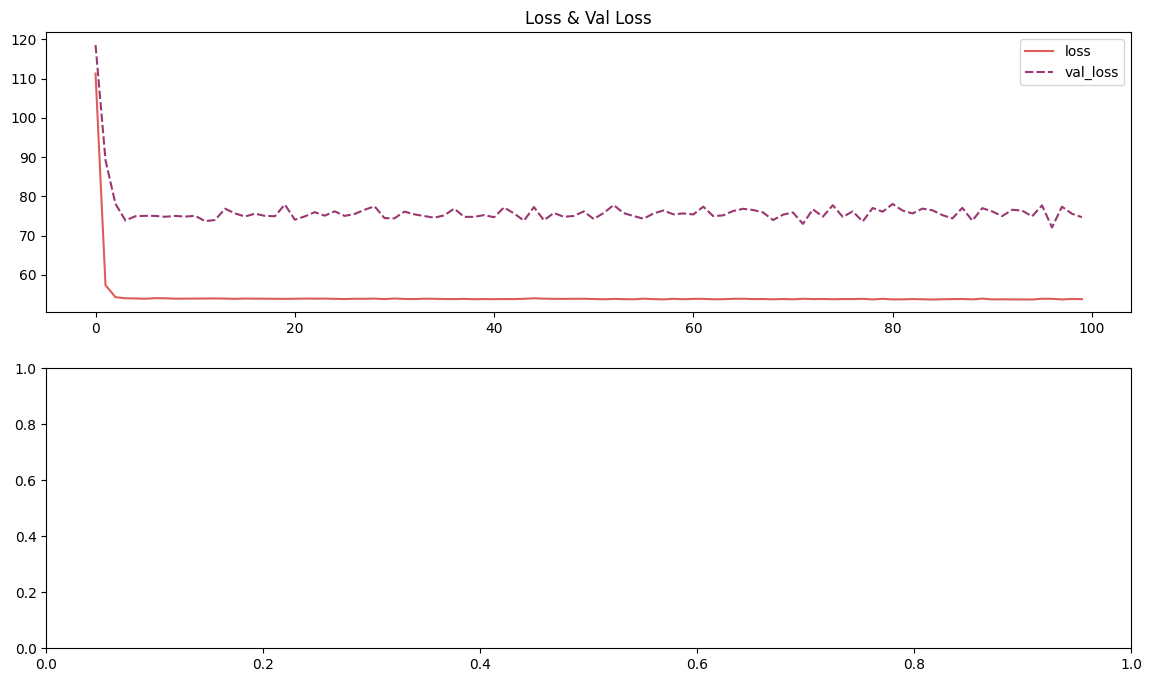

In [42]:
import seaborn as sns
history_loss = his[['loss', 'val_loss']]

fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

In [34]:
train_pred = model.predict(X_train).flatten()
val_pred = model.predict(X_val).flatten()
test_pred = model.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [36]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(data["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);

ValueError: Length of values (14510) does not match length of index (1451)